In [ ]:
import numpy as np
import pandas as pd
from fastai.tabular import *
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
train_set = pd.read_csv('/content/Train.csv')
test_set = pd.read_csv('/content/Test.csv')

In [ ]:
train_set.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
train_set.select_dtypes(['int','float']).columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:

#Categotical Features in The Dataset
train_set.select_dtypes('object').columns

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], dtype='object')

In [ ]:
train_set.drop(['ADDRESS'],axis=1,inplace=True)

In [ ]:
test_set.drop(['ADDRESS'],axis=1,inplace=True)

In [ ]:
train_set.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [ ]:
path = ''
dep_var = 'TARGET(PRICE_IN_LACS)'
cat_names = ['POSTED_BY','BHK_OR_RK','UNDER_CONSTRUCTION','RERA','BHK_NO.','READY_TO_MOVE','RESALE']
cont_names = ['SQUARE_FT','LONGITUDE','LATITUDE']

procs = [FillMissing,Categorify,Normalize]

In [ ]:
#Start index for creating a validation set from train_data
start_indx = len(train_set) - int(len(train_set) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_set)
#TabularList for Validation
val = (TabularList.from_df(train_set.iloc[start_indx:end_indx].copy(),
                           path= path,cat_names=cat_names,
                           cont_names = cont_names))
test = (TabularList.from_df(test_set, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

In [ ]:
#TabularList for training
data = (TabularList.from_df(
    train_set,path=path,cat_names=cat_names, 
    cont_names=cont_names, 
    procs=procs).split_by_idx(list(range(start_indx,end_indx)))
    .label_from_df(cols=dep_var)
    .add_test(test)
    .databunch())

In [ ]:
data.show_batch(rows=5)

POSTED_BY,BHK_OR_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,SQUARE_FT,LONGITUDE,LATITUDE,target
Owner,BHK,0,0,3,1,1,-0.0104,1.1846,0.0456,200.0
Dealer,BHK,1,1,4,0,1,-0.0101,1.1638,0.0464,360.0
Dealer,BHK,0,0,3,1,1,-0.0108,0.2108,1.1281,36.0
Dealer,BHK,0,1,3,1,1,-0.0102,0.1385,-0.1037,91.2
Owner,BHK,0,0,3,1,1,-0.0104,0.9296,-0.1256,70.0


In [ ]:
#Initializing the network
learn = tabular_learner(data, layers=[500,400,300,200, 100, 50], metrics= [rmse,r2_score])

In [ ]:
learn.summary


<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (23561 items)
x: TabularList
POSTED_BY Owner; BHK_OR_RK BHK; UNDER_CONSTRUCTION 0; RERA 0; BHK_NO. 2; READY_TO_MOVE 1; RESALE 1; SQUARE_FT -0.0107; LONGITUDE -1.3487; LATITUDE 0.0699; ,POSTED_BY Dealer; BHK_OR_RK BHK; UNDER_CONSTRUCTION 0; RERA 0; BHK_NO. 2; READY_TO_MOVE 1; RESALE 1; SQUARE_FT -0.0107; LONGITUDE -1.4610; LATITUDE -0.0231; ,POSTED_BY Owner; BHK_OR_RK BHK; UNDER_CONSTRUCTION 0; RERA 0; BHK_NO. 2; READY_TO_MOVE 1; RESALE 1; SQUARE_FT -0.0109; LONGITUDE -1.3797; LATITUDE 0.0732; ,POSTED_BY Owner; BHK_OR_RK BHK; UNDER_CONSTRUCTION 0; RERA 1; BHK_NO. 2; READY_TO_MOVE 1; RESALE 1; SQUARE_FT -0.0109; LONGITUDE 1.1830; LATITUDE 0.0452; ,POSTED_BY Dealer; BHK_OR_RK BHK; UNDER_CONSTRUCTION 1; RERA 0; BHK_NO. 2; READY_TO_MOVE 0; RESALE 1; SQUARE_FT -0.0109; LONGITUDE 0.2057; LATITUDE 1.1323; 
y: FloatList
55.0,51.0,43.0,62.5,60.5
Path: .;

Valid: LabelList (5890 items)
x: TabularList
POSTED_BY Dealer;

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


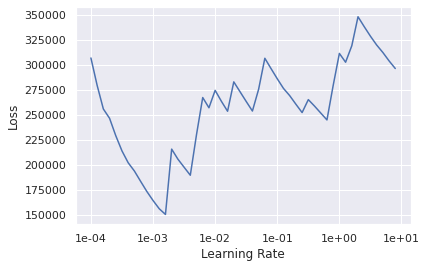

In [ ]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [ ]:
#Fitting data and training the network
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,133751.250000,1851838848.000000,19546.630859,-141078.531250,00:07
1,129852.437500,1599581.500000,796.854065,-141.047180,00:07
2,140177.250000,18888628.000000,2164.842041,-1305.428589,00:07
3,199112.515625,802510400.000000,13038.877930,-56259.507812,00:07
4,48160.300781,652520456192.000000,381266.500000,-53643676.000000,00:07
5,41331.191406,72880291840.000000,131614.093750,-5453946.500000,00:08
6,109718.281250,592076736.000000,11065.943359,-35442.582031,00:07
7,65100.449219,891491586943221760.000000,111911000.000000,-702529929216.000000,00:07
8,137222.171875,26332150890496.000000,664890.562500,-31869178.000000,00:07
9,88069.007812,2021918900224.000000,175716.484375,-2174125.250000,00:07


In [ ]:
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

POSTED_BY,BHK_OR_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,SQUARE_FT,LONGITUDE,LATITUDE,target,prediction
Dealer,BHK,0,1,2,1,1,-0.0108,0.8952,0.3937,47.1,[119.79305]
Owner,BHK,0,0,2,1,1,-0.0109,-0.9465,-0.2869,43.0,[105.198616]
Dealer,BHK,1,0,2,0,1,-0.0109,-0.3255,0.7543,33.0,[106.86988]
Owner,BHK,0,0,1,1,1,-0.0110,0.8956,-0.1091,21.5,[99.3401]
Builder,BHK,1,1,1,0,0,-0.0111,-0.7142,-0.3415,14.1,[110.111374]


In [ ]:
#Getting The Training And Validation Errors

tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))

print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

In [ ]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()

In [ ]:

#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)

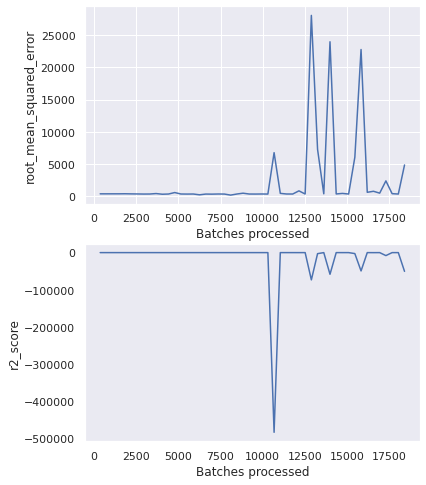

In [ ]:

#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [ ]:
val = train_set.tail(5890)

In [ ]:
#Converting the prediction to DataFrame for Comparing
val_preds = learn.get_preds(ds_type=DatasetType.Valid)[0]
val_preds = [i[0] for i in val_preds.tolist()] 
val['Predicted'] = val_preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_set.shape

(29451, 11)

In [ ]:
from sklearn.metrics import mean_squared_log_error
pred = np.array(val_preds)
ytrue = train_set['TARGET(PRICE_IN_LACS)'][23561:].values
pred = np.abs(pred)
ytrue = np.abs(ytrue)
np.sqrt(mean_squared_log_error(ytrue,pred))

1.040010600430333

In [ ]:
val.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Predicted
23561,Dealer,0,1,2,BHK,1239.473684,1,1,26.860560,80.915830,47.1,52.391129
23562,Owner,0,0,2,BHK,968.686641,1,1,15.459622,73.941404,43.0,28.207909
23563,Dealer,1,0,2,BHK,980.100980,0,1,19.304032,84.610965,33.0,37.471916
23564,Owner,0,0,1,BHK,700.097688,1,1,26.862600,75.763300,21.5,16.446129
23565,Builder,1,1,1,BHK,565.130261,0,0,16.897246,73.382029,14.1,7.848967
23566,Owner,0,0,1,BHK,344.475632,1,1,30.292178,78.068793,13.5,15.347199
23567,Dealer,1,0,2,BHK,723.085163,0,1,22.648322,88.443152,54.0,29.548740
23568,Owner,0,0,3,BHK,1250.000000,1,1,27.180000,78.020000,32.0,39.139229
23569,Owner,0,0,2,BHK,840.145322,1,1,22.659210,88.438400,18.5,18.196606
23570,Dealer,0,0,4,BHK,5092.003240,1,1,28.403138,77.070052,440.0,235.585342


In [ ]:
test_set.iloc[0]

POSTED_BY               Owner
UNDER_CONSTRUCTION          0
RERA                        0
BHK_NO.                     1
BHK_OR_RK                 BHK
SQUARE_FT             545.171
READY_TO_MOVE               1
RESALE                      1
LONGITUDE              21.262
LATITUDE              73.0477
Name: 0, dtype: object

In [ ]:
#Prediction in float for Test set data for row 0
float(learn.predict(test_set.iloc[0])[1])

16.193439483642578

In [ ]:
test_predictions = np.abs(learn.get_preds(ds_type=DatasetType.Test)[0])

In [ ]:
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]

In [ ]:
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['TARGET(PRICE_IN_LACS)'])

In [ ]:
#Writing the predictions to an excel file.
test_predictions.to_csv("submit.csv", index = False)